<a href="https://colab.research.google.com/github/Esteban1209/Predicting-Co2-emissions-with-ML-in-python/blob/main/Co2_emissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importar las bibliotecas necesarias
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from google.colab import files


In [3]:
# Cargar el conjunto de datos
uploaded = files.upload()
# Asegúrate de que el archivo 'FuelConsumptionCo2.csv' esté en tu directorio de trabajo
df = pd.read_csv('FuelConsumptionCo2.csv')

Saving FuelConsumptionCo2.csv to FuelConsumptionCo2.csv


In [4]:
# Resumir los datos
print(df.describe())

       MODELYEAR   ENGINESIZE    CYLINDERS  FUELCONSUMPTION_CITY  \
count     1067.0  1067.000000  1067.000000           1067.000000   
mean      2014.0     3.346298     5.794752             13.296532   
std          0.0     1.415895     1.797447              4.101253   
min       2014.0     1.000000     3.000000              4.600000   
25%       2014.0     2.000000     4.000000             10.250000   
50%       2014.0     3.400000     6.000000             12.600000   
75%       2014.0     4.300000     8.000000             15.550000   
max       2014.0     8.400000    12.000000             30.200000   

       FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  \
count          1067.000000           1067.000000               1067.000000   
mean              9.474602             11.580881                 26.441425   
std               2.794510              3.485595                  7.468702   
min               4.900000              4.700000                 11.000000 

In [5]:
# Seleccionar columnas relevantes
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
print(cdf.head(9))

   ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  CO2EMISSIONS
0         2.0          4                   8.5           196
1         2.4          4                   9.6           221
2         1.5          4                   5.9           136
3         3.5          6                  11.1           255
4         3.5          6                  10.6           244
5         3.5          6                  10.0           230
6         3.5          6                  10.1           232
7         3.7          6                  11.1           255
8         3.7          6                  11.6           267


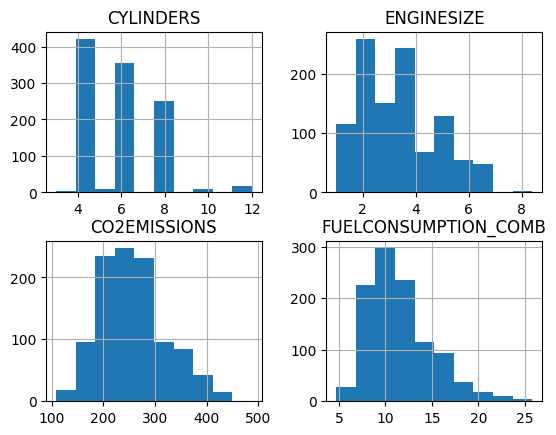

In [6]:
# Visualizar la distribución de los datos
viz = cdf[['CYLINDERS', 'ENGINESIZE', 'CO2EMISSIONS', 'FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

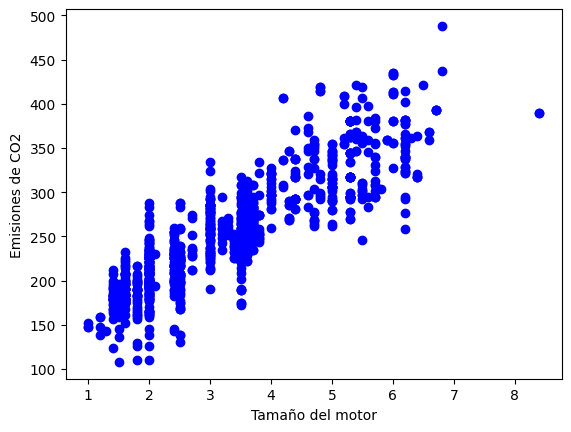

In [7]:
# Gráfica de dispersión: Tamaño del motor vs Emisiones de CO2
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Tamaño del motor")
plt.ylabel("Emisiones de CO2")
plt.show()

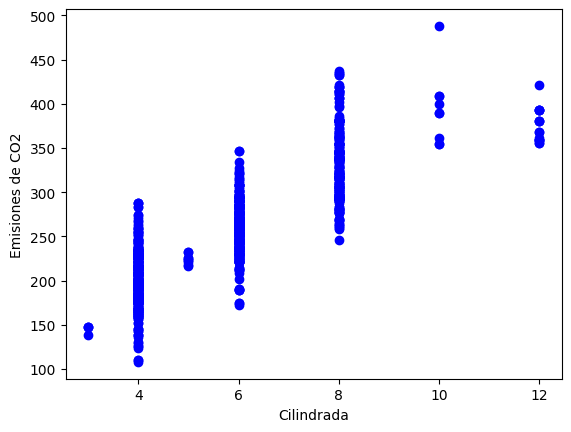

In [8]:
# Gráfica de dispersión: Cilindrada vs Emisiones de CO2
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Cilindrada")
plt.ylabel("Emisiones de CO2")
plt.show()

In [9]:
# Dividir los datos en conjunto de entrenamiento y prueba
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

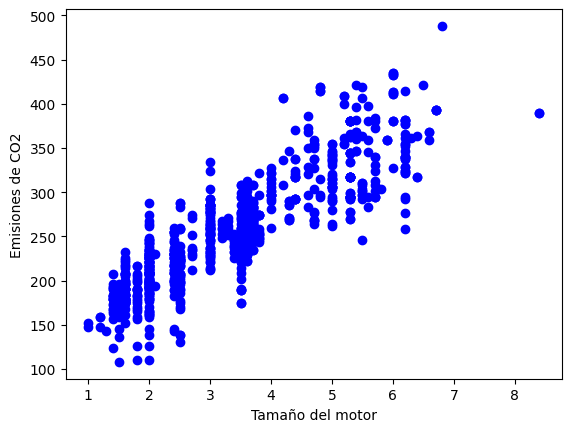

In [10]:
# Gráfica de dispersión del conjunto de entrenamiento
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.xlabel("Tamaño del motor")
plt.ylabel("Emisiones de CO2")
plt.show()

In [15]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[38.69295516]]
Intercept:  [126.68370405]


Text(0, 0.5, 'Emission')

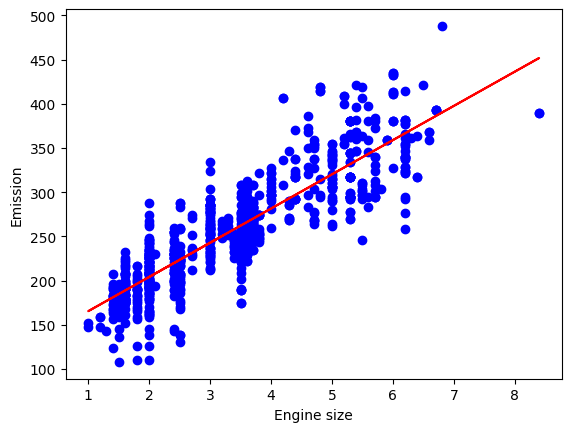

In [16]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [17]:
from sklearn.metrics import r2_score


In [19]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 20.69
Residual sum of squares (MSE): 737.38
R2-score: 0.81


In [20]:
train_x = train[["FUELCONSUMPTION_COMB"]]


In [21]:
test_x = test[["FUELCONSUMPTION_COMB"]]


In [22]:
regr = linear_model.LinearRegression()


In [23]:
regr.fit(train_x, train_y)


LinearRegression()

In [24]:
predictions = regr.predict(test_x)


In [25]:
print("Mean Absolute Error: %.2f" % np.mean(np.absolute(predictions - test_y)))

Mean Absolute Error: 19.03
